In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import langdetect

In [2]:
dataset = pd.read_csv(r"..\data\shoe_dataset.csv")
dataset.head(10)

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),review_title,review_text,review_rating,url
0,pdct__0101,Nike,Basketball,Men,US 10,"2,242",170.0,Love em,Love these. Was looking for converses and thes...,5,"https://static.nike.com/a/images/c_limit,w_592..."
1,pdct__0102,Adidas,Running,Men,US 9.5,240,180.0,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,https://m.media-amazon.com/images/I/81RV6pBH0q...
2,pdct__0103,Reebok,Casual,Men,US 11,"16,662",75.0,Good quality,Good quality,5,https://m.media-amazon.com/images/I/51jV3wqLqj...
3,pdct__0104,Converse,Casual,Women,US 8,135,55.0,Good,Great,5,https://m.media-amazon.com/images/I/81aeZowGDr...
4,pdct__0105,Puma,Lifestyle,Women,US 7.5,240,80.0,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5,https://m.media-amazon.com/images/I/61hTOTpCo6...
5,pdct__0106,Vans,Skate,Men,US 8.5,455,65.0,delusione,Sono solita comprare scarpe Guess e non ho mai...,1,https://m.media-amazon.com/images/I/718YZusQ7D...
6,pdct__0107,New Balance,Running,Women,US 6.5,"72,611",175.0,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5,https://m.media-amazon.com/images/I/71Ztvxh9sZ...
7,pdct__0108,Asics,Running,Men,US 10.5,84,160.0,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5,https://m.media-amazon.com/images/I/61Vgm7pMbv...
8,pdct__0109,Fila,Fashion,Women,US 9,"1,795",65.0,Bellissime....peccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5,https://example.com/default.png
9,pdct__0110,Skechers,Running,Men,US 9,309,110.0,"Scarpe ben realizzate, venditore ottimo",Le scarpe sono ben fatte e il venditore molto ...,5,https://example.com/default.png


In [3]:
# Stimulate new columns
num_user = 870
dataset['Product_id'] = np.random.choice([f"pdct_{p}" for p in range(34792, 99038)], size=len(dataset), replace=True)
dataset['User_id'] = np.random.choice([f"user_{i}" for i in range(1, num_user+1)], size=len(dataset), replace=True)
dataset.head()

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),review_title,review_text,review_rating,url,User_id
0,pdct_79691,Nike,Basketball,Men,US 10,"2,242",170.0,Love em,Love these. Was looking for converses and thes...,5,"https://static.nike.com/a/images/c_limit,w_592...",user_793
1,pdct_53183,Adidas,Running,Men,US 9.5,240,180.0,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,https://m.media-amazon.com/images/I/81RV6pBH0q...,user_110
2,pdct_48632,Reebok,Casual,Men,US 11,"16,662",75.0,Good quality,Good quality,5,https://m.media-amazon.com/images/I/51jV3wqLqj...,user_371
3,pdct_64501,Converse,Casual,Women,US 8,135,55.0,Good,Great,5,https://m.media-amazon.com/images/I/81aeZowGDr...,user_169
4,pdct_46322,Puma,Lifestyle,Women,US 7.5,240,80.0,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5,https://m.media-amazon.com/images/I/61hTOTpCo6...,user_263


In [4]:
# Reorder the columns
cols = list(dataset.columns)
cols.remove('Product_id')
cols.remove('User_id')
cols.insert(0, 'Product_id')
cols.insert(7, 'User_id')
dataset = dataset[cols]
dataset.head(10)

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating,url
0,pdct_79691,Nike,Basketball,Men,US 10,"2,242",170.0,user_793,Love em,Love these. Was looking for converses and thes...,5,"https://static.nike.com/a/images/c_limit,w_592..."
1,pdct_53183,Adidas,Running,Men,US 9.5,240,180.0,user_110,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,https://m.media-amazon.com/images/I/81RV6pBH0q...
2,pdct_48632,Reebok,Casual,Men,US 11,"16,662",75.0,user_371,Good quality,Good quality,5,https://m.media-amazon.com/images/I/51jV3wqLqj...
3,pdct_64501,Converse,Casual,Women,US 8,135,55.0,user_169,Good,Great,5,https://m.media-amazon.com/images/I/81aeZowGDr...
4,pdct_46322,Puma,Lifestyle,Women,US 7.5,240,80.0,user_263,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5,https://m.media-amazon.com/images/I/61hTOTpCo6...
5,pdct_50520,Vans,Skate,Men,US 8.5,455,65.0,user_579,delusione,Sono solita comprare scarpe Guess e non ho mai...,1,https://m.media-amazon.com/images/I/718YZusQ7D...
6,pdct_44832,New Balance,Running,Women,US 6.5,"72,611",175.0,user_56,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5,https://m.media-amazon.com/images/I/71Ztvxh9sZ...
7,pdct_69762,Asics,Running,Men,US 10.5,84,160.0,user_818,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5,https://m.media-amazon.com/images/I/61Vgm7pMbv...
8,pdct_56810,Fila,Fashion,Women,US 9,"1,795",65.0,user_48,Bellissime....peccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5,https://example.com/default.png
9,pdct_54555,Skechers,Running,Men,US 9,309,110.0,user_76,"Scarpe ben realizzate, venditore ottimo",Le scarpe sono ben fatte e il venditore molto ...,5,https://example.com/default.png


In [5]:
dataset.shape

(1001, 12)

In [6]:
def clean_review(text):
    try:
        if langdetect.detect(text) != 'en':
            return ""
    except:
        return ""

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataset['clean_review_title'] = dataset['review_title'].astype(str).apply(clean_review)
dataset['clean_review_text'] = dataset['review_text'].astype(str).apply(clean_review)

In [7]:
dataset.sample(20)

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating,url,clean_review_title,clean_review_text
39,pdct_95370,Skechers,Walking,Women,US 7.5,112,60.0,user_725,Thank you!,These shoes are cute and jus fine. I wanted to...,5,https://example.com/default.png,,these shoes are cute and jus fine i wanted to ...
481,pdct_69718,Asics,Running,Men,US 10,240,160.0,user_330,Not waterproof or even water resistant,The sole was cracked Where the sole meats the ...,1,https://m.media-amazon.com/images/I/61ayO9UUL9...,,the sole was cracked where the sole meats the ...
708,pdct_45619,Converse,Casual,Women,US 7.5,83,65.0,user_189,livraison trÃ¨s rapide et sans soucis.ma trois...,"Pour la course sur route , bitume, et chemin s...",5,https://m.media-amazon.com/images/I/61CWwjg+GZ...,,
80,pdct_36982,Nike,Lifestyle,Women,US 7.5,"7,712",85.0,user_76,Not What I Expected,It took me a half hour to get these shoes on. ...,2,"https://static.nike.com/a/images/c_limit,w_592...",not what i expected,it took me a half hour to get these shoes on n...
449,pdct_64380,Puma,Running,Men,US 11,392,100.0,user_14,"SchÃ¶ner, bequemer Schuh",Ich finde das Design sehr schÃ¶n. Schlicht mit...,5,https://m.media-amazon.com/images/I/61uyKbmXIa...,,
613,pdct_80049,Skechers,Walking,Women,US 7,245,60.0,user_749,Beautiful,Beautiful but too small. I ordered the wrong size,4,https://example.com/default.png,,beautiful but too small i ordered the wrong size
688,pdct_96908,Puma,Basketball,Men,US 11,392,120.0,user_821,Maintain quality,Not fit for sports person.it fales side when w...,2,https://m.media-amazon.com/images/I/71nM73MTMv...,,not fit for sports personit fales side when we...
468,pdct_42781,Puma,Running,Men,US 8.5,165,100.0,user_286,"Lovely, but...","This shoe is well built, one of the best looki...",3,https://m.media-amazon.com/images/I/81P2D+Bc1n...,lovely but,this shoe is well built one of the best lookin...
888,pdct_49216,Converse,Casual,Men,US 11.5,206,85.0,user_206,Belles et confortables,"De belles sandales, trÃ¨s confortables et rÃ©g...",5,https://m.media-amazon.com/images/I/610HW8LRHP...,,
640,pdct_97851,New Balance,Casual,Women,US 9,317,80.0,user_738,Scarpe volley,"Arrivate con un giorno di ritardo, ma avvertit...",5,https://m.media-amazon.com/images/I/61B+jB4xNA...,,


In [8]:
dataset['combined_review'] = dataset['clean_review_title'] + " " + dataset['clean_review_text']
dataset = dataset[dataset['combined_review'].str.strip() != '']

In [9]:
dataset.head()

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating,url,clean_review_title,clean_review_text,combined_review
0,pdct_79691,Nike,Basketball,Men,US 10,"2,242",170.0,user_793,Love em,Love these. Was looking for converses and thes...,5,"https://static.nike.com/a/images/c_limit,w_592...",,love these was looking for converses and these...,love these was looking for converses and thes...
1,pdct_53183,Adidas,Running,Men,US 9.5,240,180.0,user_110,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,https://m.media-amazon.com/images/I/81RV6pBH0q...,the plastic ripped,the shoes are very cute but after the nd day o...,the plastic ripped the shoes are very cute but...
2,pdct_48632,Reebok,Casual,Men,US 11,"16,662",75.0,user_371,Good quality,Good quality,5,https://m.media-amazon.com/images/I/51jV3wqLqj...,good quality,good quality,good quality good quality
3,pdct_64501,Converse,Casual,Women,US 8,135,55.0,user_169,Good,Great,5,https://m.media-amazon.com/images/I/81aeZowGDr...,,great,great
14,pdct_37352,Puma,Lifestyle,Men,US 9.5,245,110.0,user_860,Perfect right outta the box,True to size. If between I'd probably go with ...,5,https://m.media-amazon.com/images/I/61baYgulRj...,perfect right outta the box,true to size if between id probably go with yo...,perfect right outta the box true to size if be...


In [10]:
dataset.to_csv(r"../data/cleaned_shoe_dataset.csv", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_19420\447838068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_rating', data=dataset, palette='viridis')


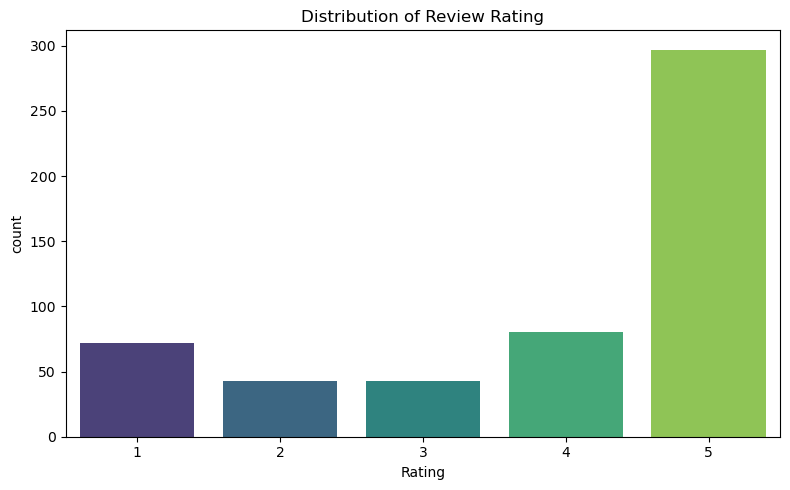

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='review_rating', data=dataset, palette='viridis')
plt.title("Distribution of Review Rating")
plt.xlabel("Rating")
plt.ylabel("count")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19420\143827905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="rocket")


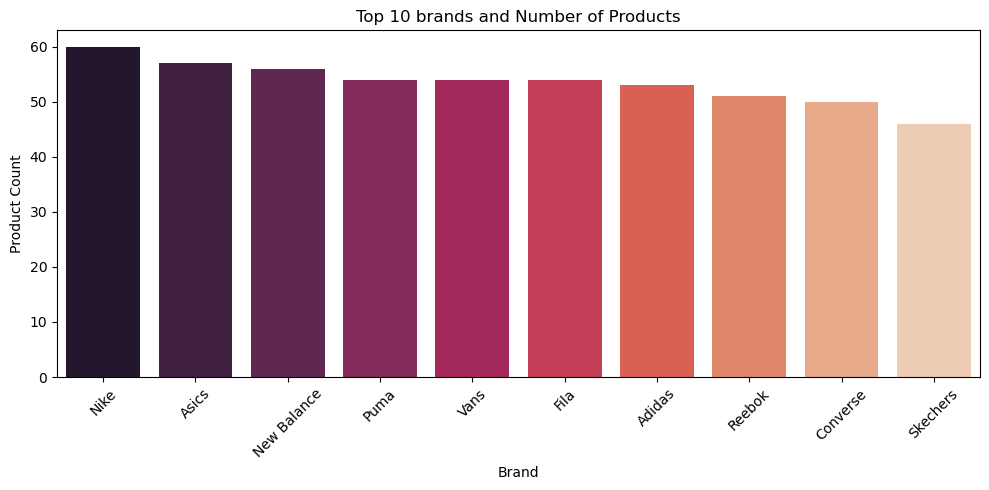

In [12]:
top_brands = dataset['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="rocket")
plt.title("Top 10 brands and Number of Products")
plt.xlabel("Brand")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19420\813656287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Type", data=dataset, order=dataset['Type'].value_counts().index, palette="coolwarm")


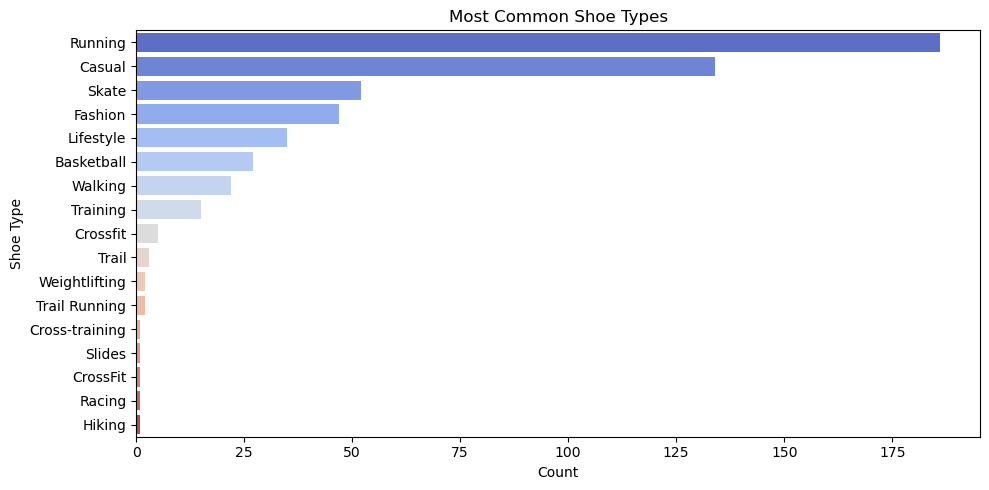

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y="Type", data=dataset, order=dataset['Type'].value_counts().index, palette="coolwarm")
plt.title("Most Common Shoe Types")
plt.xlabel("Count")
plt.ylabel("Shoe Type")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19420\2598185774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_rating', y='Price(USD)', data=dataset, palette="mako")


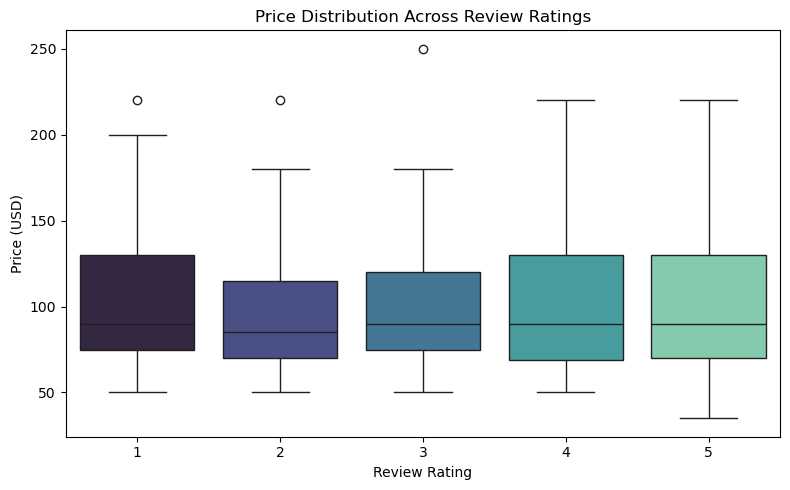

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='review_rating', y='Price(USD)', data=dataset, palette="mako")
plt.title("Price Distribution Across Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()